## Decision Tree Regressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [4]:
print(california_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df = pd.DataFrame(california_df.data, columns=california_df.feature_names)
df["Target"] = california_df.target
# taking sample data
df=df.sample(frac=0.25)

In [8]:
# independent features
X = df.iloc[:, :-1]
# dependent feature
y = df.iloc[:, -1]

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11745,6.4789,15.0,7.909231,1.025385,3868.0,2.975385,38.77,-121.14
13993,3.4740,24.0,5.250958,1.105364,1551.0,2.971264,34.89,-116.99
9823,3.4327,52.0,5.126761,1.133803,313.0,2.204225,36.62,-121.92
6975,2.3182,25.0,4.136054,1.130612,1580.0,2.149660,33.98,-118.04
17610,5.6266,36.0,5.981013,0.943038,371.0,2.348101,37.29,-121.91


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [13]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
y_pred

array([1.557, 2.02 , 1.831, ..., 2.921, 2.698, 1.274])

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)

In [17]:
score

0.5048810054678656

In [18]:
# Hyperparameter Tuning
params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "max_features": ["auto", "sqrt", "log2"]
}

regressor = DecisionTreeRegressor()

In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor, param_grid=params, cv=2, scoring="neg_mean_squared_error")

In [20]:
regressorcv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
regressorcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [25]:
regressor = DecisionTreeRegressor(criterion="absolute_error",
                                 max_depth=7,
                                 max_features="auto",
                                 splitter="best"
)

In [27]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [29]:
%matplotlib inline

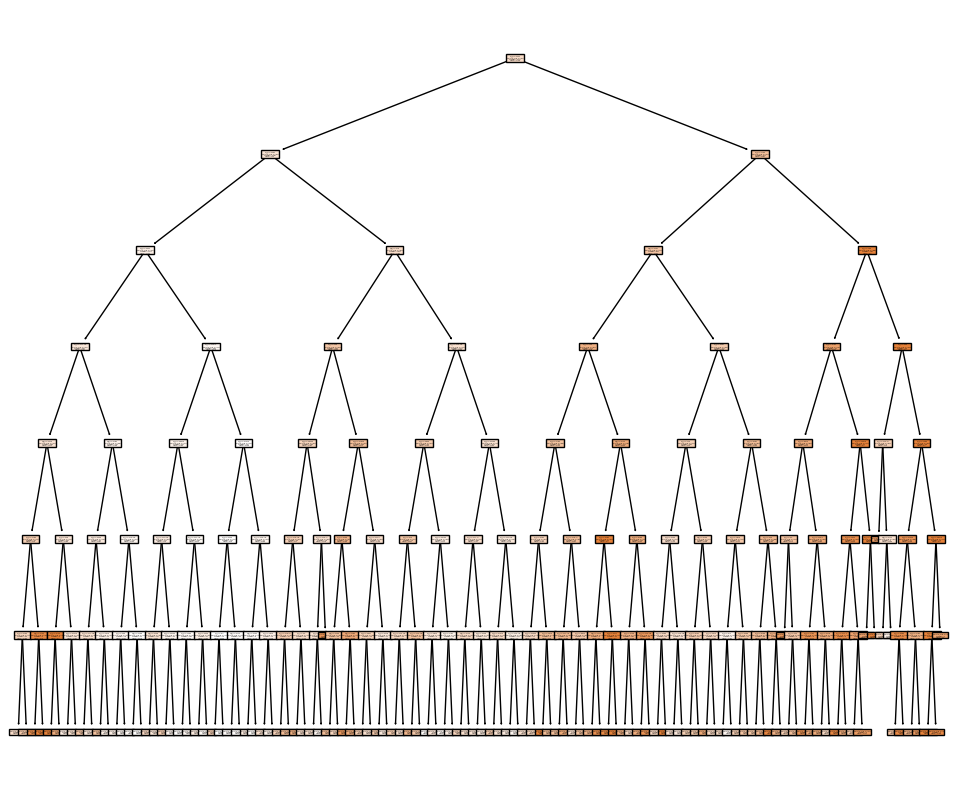

In [30]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [31]:
y_pred = regressor.predict(X_test)

In [33]:
r2_score(y_pred, y_test)

0.5270357991076489